## Data Mining and Machine Learning
### k-nn density estimation
#### Edgar Acuna
#### Marzo 2020

### knn Estimation of a univariate density function 

$$\hat{f}(t)=\frac{k}{2nd_k(t)},$$

where k is the number of neighbors, t is the point where the density function will be estimated, n is the
number of oberved datapoints, and $d_k(T)$ is the distance from t to its k-th nearest neighbor 

In [1]:
import numpy as np
import scipy.spatial.distance
from sklearn.metrics.pairwise  import pairwise_distances
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Esta funcion estima una densidad univariada usando el metodo k-nn
def fdknn(y, npoints, k):
    """
    Parameters
    y es la muestra tomada
    npoints: es el numero de puntos donde se va a estimar la funcion de densidad
    k : es el numero de vecinos mas cercanos
    la densidad estimada en los puntos npoints y su plot
    """
    m=min(y)
    M=max(y)
    x=np.linspace(m-1,M+1,num=npoints) 
    x = x.reshape(-1,1)
    y=np.asarray(y)
    y = y.reshape(-1,1)
    d = pairwise_distances(x,y)
    d = np.sort(d, axis=1)
    d2=2*d[:,(k-1)]
    fest= k/(len(y) * d2)
    return x,fest

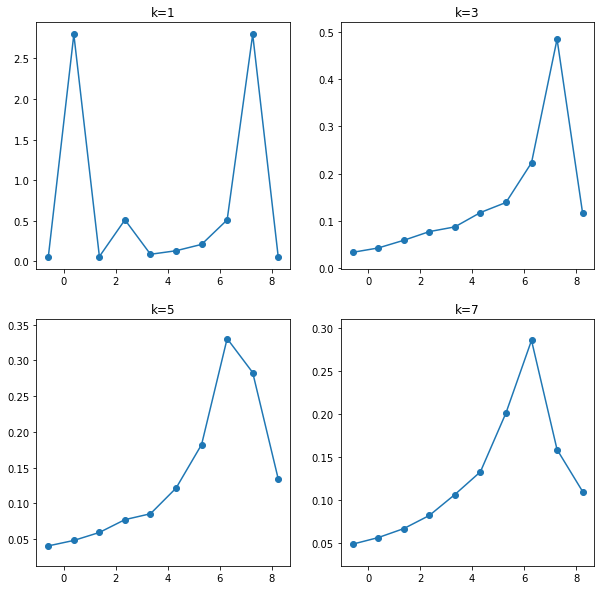

In [3]:
#Estimando la funcion de densidad basada en la muestra tomada y
y=[7.03860,6.38018,6.95461,2.25521,7.24608,6.62930,3.92734,0.40701,5.59448,5.05751]
#Con  1 vecino mas cercano
x,fest1=fdknn(y,10,1)
# con k=3 vecinos
x,fest3=fdknn(y,10,3)
# con k=5 vecinos
x,fest5=fdknn(y,10,5)
# con k-7 vecinos
x,fest7=fdknn(y,10,7)
#Ploteando los scatter plots
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(221)

ax1.scatter(x,fest1)
ax1.plot(x,fest1)
plt.title("k=1")

ax2 = fig.add_subplot(222)
ax2.scatter(x,fest3)
ax2.plot(x,fest3)
plt.title("k=3")

ax3 = fig.add_subplot(223)
ax3.scatter(x,fest5)
ax3.plot(x,fest5)
plt.title("k=5")

ax4 = fig.add_subplot(224)
ax4.scatter(x,fest7)
ax4.plot(x,fest7)
plt.title("k=7")

plt.show()


Comment: When k increases the density curve gets que smoother and overfitting can occur.

(array([0.08773123, 0.04386561, 0.30705929]),
 array([0.40701, 2.6867 , 4.96639, 7.24608]),
 <a list of 3 Patch objects>)

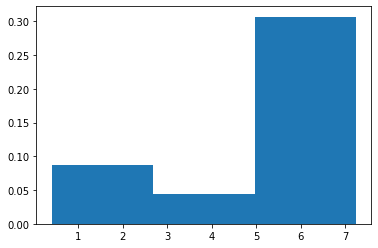

In [4]:
#Haciendo el Histograma de los valores de y
plt.hist(y,bins=3,density=True)